In [1]:
import numpy as np
import matplotlib.pyplot as plt
from motion_integration import get_bond_lengths, find_bond_forces, nondimensionalize
from binding_expt import parse_file

In [24]:
with np.load('data/bd_run503.npz') as data:  # Trial with a large jump to a negative z value
    t = data['t']
    x = data['x']
    y = data['y']
    z = data['z']
    r_matrices = data['r_matrices']
    bond_array = data['bond_array']
    receptors = data['receptors']

pars = parse_file('bd_run503')
del pars['filename']
del pars['seed']
del pars['t_start']
del pars['t_end']
del pars['num_steps']
del pars['n_nodes']
del pars['a']
del pars['b']
del pars['adaptive']
del pars['one_side']
del pars['check_bonds']
t_sc, f_sc, lam, k0_on, k0_off, eta, eta_ts, kappa = nondimensionalize(l_scale=1, mu=4e-3, temp=310., **pars)

In [28]:
z_diffs = (z[1:] - z[:-1]) / (t[1:] - t[:-1])
ii = np.nonzero(z_diffs < -50000)[0][0]
print(bond_array[..., ii - 2])
print()
print(bond_array[..., ii - 1])
print()
print(bond_array[..., ii])

[[ 5.89000000e+02 -3.98329497e-02  1.11010402e+01]]

[[ 5.89000000e+02 -3.98329497e-02  1.11010402e+01]]

[[ 5.89000000e+02 -3.98329497e-02  1.11010402e+01]]


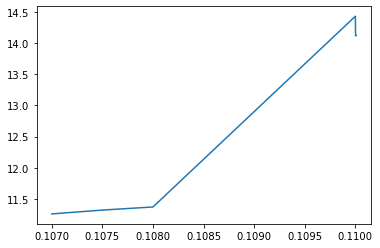

In [30]:
plt.plot(t[ii-3:ii+4], z[ii-3:ii+4])
plt.show()

In [31]:
# Process bonds

def find_forces(i):
    rmat = r_matrices[..., i]
    true_receptors = np.dot(receptors, rmat.T)
    x1, x2, x3 = x[i], y[i], z[i]
    true_receptors += np.array([[x1, x2, x3]])

    bond_list = [row for row in bond_array[..., i] if row[0] > -1]
    get_bond_lengths(bond_list, true_receptors)

    center = np.array([x1, x2, x3])
    return find_bond_forces(receptors, bond_list, center, rmat, kappa, lam)

In [33]:
f1, t1 = find_forces(ii-3)
f2, t2 = find_forces(ii-2)
f3, t3 = find_forces(ii-1)
f4, t4 = find_forces(ii)

print(np.linalg.norm(f2 - f1), np.linalg.norm(t2 - t1))
print(np.linalg.norm(f2 - f3), np.linalg.norm(t2 - t3))
print(np.linalg.norm(f4 - f3), np.linalg.norm(t4 - t3))

32.13944279358214 47.522652810456215
896.5756469002129 1323.0853245606438
133011.36350694735 36089.81968737676
